# Top Paying vs. Top In-Demand Data Science Skills — What's the Difference?

In [24]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Scientist Data
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])

## Top Skills That Pay: What Data Scientist Roles in the US Really Value

In [25]:
# Expand the 'job_skills' list into separate rows, one for each skill
df_DS_US = df_DS_US.explode('job_skills')

# Group the data by 'job_skills' and calculate the count and median of 'salary_year_avg' for each skill
df_DS_US_grouped = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Sort the grouped data by median salary in descending order and select the top 10 highest-paying skills
df_DS_Top_Paying = df_DS_US_grouped.sort_values(by='median', ascending=False).head(10)

# Display the result
df_DS_Top_Paying

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [26]:
# Sort skills by frequency (count) in descending order and take the top 10 most common skills
df_DS_skills = df_DS_US_grouped.sort_values(by='count', ascending=False) \
                                .head(10) \
                                .sort_values(by='median', ascending=False)

# Display the result: Top 10 most common skills, ordered by their median salary
df_DS_skills


,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
hadoop,468,125000.0
tableau,989,125000.0
excel,490,124290.0


## Which Data Science Skills Bring the Highest Pay in the US?

### The top chart shows high-paying skills regardless of popularity, while the bottom one highlights the most common skills that also offer great compensation. Mastering a few of these can level up your earning potential.

(0.0, 271950.0)

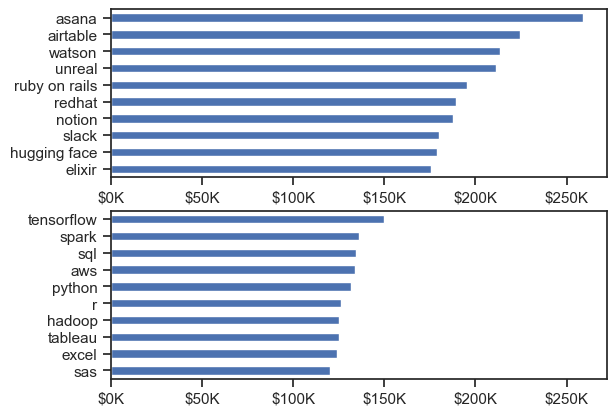

In [27]:
# Create a figure with two subplots (vertically stacked)
fig, ax = plt.subplots(2, 1)

# Plot the top-paying job skills (reversed for highest at top) as a horizontal bar chart
df_DS_Top_Paying[::-1].plot(kind='barh', y='median', ax=ax[0])
# Format the x-axis to show salary in thousands with a dollar sign
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_ylabel('')
ax[0].legend().remove()
# Plot the most common job skills (also reversed) as a horizontal bar chart
df_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
# Format the x-axis in the same way
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_ylabel('') 
ax[1].legend().remove()
# Set the same x-axis limits for both plots to allow for easy comparison
ax[1].set_xlim(ax[0].get_xlim())

## Here I Developed this visualization further by Using `seaborn`

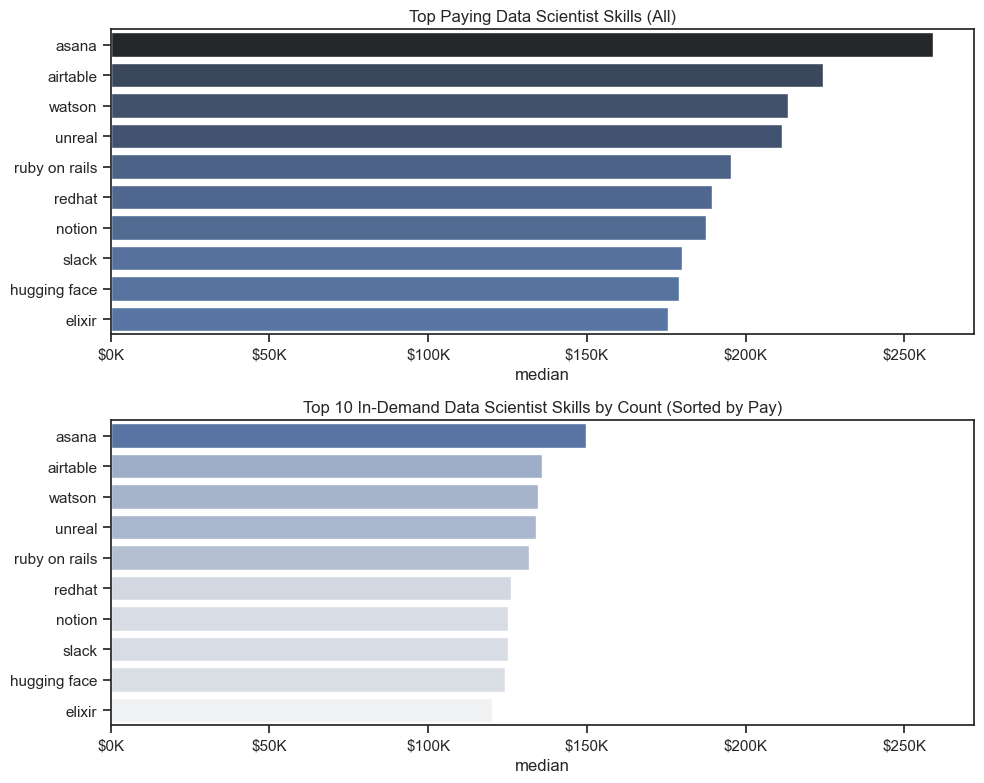

In [28]:
import seaborn as sns

sns.set_theme(style='ticks')
# Create a 2-row, 1-column subplot layout
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# ───── First Plot: Top Paying Skills ─────
# Plot horizontal bar chart for top-paying skills (reversed for descending order)
# df_DS_Top_Paying[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue')

sns.barplot(data=df_DS_Top_Paying, x='median', y=df_DS_Top_Paying.index, ax=ax[0], hue='median', palette='dark:b_r')

# Set plot title and formatting for the first subplot
ax[0].set_title('Top Paying Data Scientist Skills (All)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))  # Format salary axis in $K
ax[0].legend().remove()       # Remove legend for clarity
ax[0].set_ylabel('')          # Remove y-axis label (skill names are already shown)

# ───── Second Plot: Most Common Top Paying Skills ─────
# Plot horizontal bar chart for top 10 in-demand but also high-paying skills
# df_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1], color='lightgreen')
sns.barplot(data=df_DS_skills, x='median', y=df_DS_Top_Paying.index,ax=ax[1] ,hue='median', palette='light:b')
# Set plot title and formatting for the second subplot
ax[1].set_title('Top 10 In-Demand Data Scientist Skills by Count (Sorted by Pay)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))  # Format salary axis in $K
ax[1].legend().remove()
ax[1].set_ylabel('')

# Match x-axis range across both plots for consistency
ax[1].set_xlim(ax[0].get_xlim())

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Display both plots
plt.show()
